In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')


In [3]:
import pandas as pd
train_data = pd.read_csv('Train.csv')
test_data=pd.read_csv('Test.csv')

In [4]:


# Replace '?' with NaN
train_data.replace('?', np.nan, inplace=True)
test_data.replace('?', np.nan, inplace=True)

In [5]:
train_data.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [6]:
# Check for null values in train dataset
train_null_values = train_data.isnull().sum()
print("Null values in train dataset:")
print(train_null_values[train_null_values > 0])

# Check for null values in test dataset
test_null_values = test_data.isnull().sum()
print("\nNull values in test dataset:")
print(test_null_values[test_null_values > 0])


Null values in train dataset:
class                             105245
education_institute               196197
unemployment_reason               202979
is_labor_union                    189420
occupation_code_main              105694
under_18_family                   151654
veterans_admin_questionnaire      207415
migration_code_change_in_msa        1588
migration_prev_sunbelt             88452
migration_code_move_within_reg      1588
migration_code_change_in_reg        1588
residence_1_year_ago              106284
old_residence_reg                 193148
old_residence_state               193148
dtype: int64

Null values in test dataset:
class                             45079
education_institute               84170
unemployment_reason               87106
is_labor_union                    81322
occupation_code_main              45273
under_18_family                   64972
veterans_admin_questionnaire      88859
migration_code_change_in_msa        651
migration_prev_sunbelt           

In [7]:
train_null_cols = train_data.columns[train_data.isnull().any()]
test_null_cols = test_data.columns[test_data.isnull().any()]


In [8]:
# Replace null values in train dataset
for col in train_null_cols:
    if train_data[col].dtype == 'object':
        mode_val = train_data[col].mode()[0]
        train_data[col].fillna(mode_val, inplace=True)
    else:
        median_val = train_data[col].median()
        train_data[col].fillna(median_val, inplace=True)

# Replace null values in test dataset
for col in test_null_cols:
    if test_data[col].dtype == 'object':
        mode_val = test_data[col].mode()[0]
        test_data[col].fillna(mode_val, inplace=True)
    else:
        median_val = test_data[col].median()
        test_data[col].fillna(median_val, inplace=True)


In [9]:
print("Null values in train dataset after replacement:")
print(train_data.isnull().sum())

print("\nNull values in test dataset after replacement:")
print(test_data.isnull().sum())


Null values in train dataset after replacement:
ID                                0
age                               0
gender                            0
education                         0
class                             0
education_institute               0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
unemployment_reason               0
employment_stat                   0
wage_per_hour                     0
is_labor_union                    0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              0
total_employed                    0
household_stat                    0
household_summary                 0
under_18_family                   0
veterans_admin_questionnaire      0
vet_benefit                       0
tax_status                        0
gains           

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [11]:
# Combine train and test data for encoding
combined_data = pd.concat([train_data, test_data])

In [12]:
# Check data types of all columns
print(combined_data.dtypes)

ID                                 object
age                                 int64
gender                             object
education                          object
class                              object
education_institute                object
marital_status                     object
race                               object
is_hispanic                        object
employment_commitment              object
unemployment_reason                object
employment_stat                     int64
wage_per_hour                       int64
is_labor_union                     object
working_week_per_year               int64
industry_code                       int64
industry_code_main                 object
occupation_code                     int64
occupation_code_main               object
total_employed                      int64
household_stat                     object
household_summary                  object
under_18_family                    object
veterans_admin_questionnaire      

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:

print(combined_data.head())  # View the first few rows of the data
print(combined_data.info())  # Get information about the dataset, including data types and missing values

          ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate              Private   
1  ID_TZ0001   65   Female    High school graduate              Private   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children              Private   
4  ID_TZ0004   70     Male    High school graduate              Private   

  education_institute                    marital_status  \
0         High school                           Widowed   
1         High school                           Widowed   
2         High school                     Never married   
3         High school                     Never married   
4         High school   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  ...  \
0                       White   All other         Not in labor force  ...   
1                       White   All othe

In [15]:
# Summarize the Data
print(combined_data.describe())  # Get summary statistics for numerical columns


                 age  employment_stat  wage_per_hour  working_week_per_year  \
count  299285.000000    299285.000000  299285.000000          299285.000000   
mean       34.538998         0.176461      55.105027              23.178375   
std        22.318468         0.555240     273.340729              24.404016   
min         0.000000         0.000000       0.000000               0.000000   
25%        15.000000         0.000000       0.000000               0.000000   
50%        33.000000         0.000000       0.000000               8.000000   
75%        50.000000         0.000000       0.000000              52.000000   
max        90.000000         2.000000    9999.000000              52.000000   

       industry_code  occupation_code  total_employed    vet_benefit  \
count  299285.000000    299285.000000   299285.000000  299285.000000   
mean       15.345818        11.314743        1.956172       1.516498   
std        18.053638        14.455980        2.364857       0.850395   


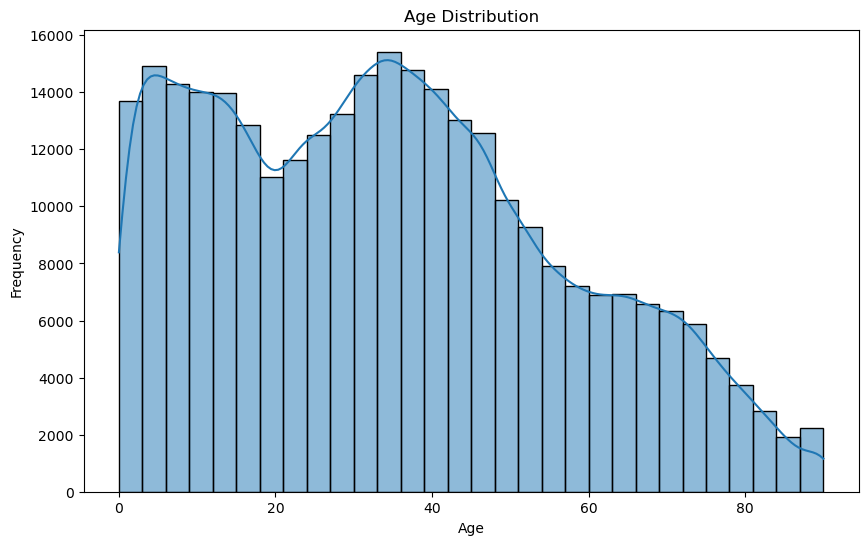

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



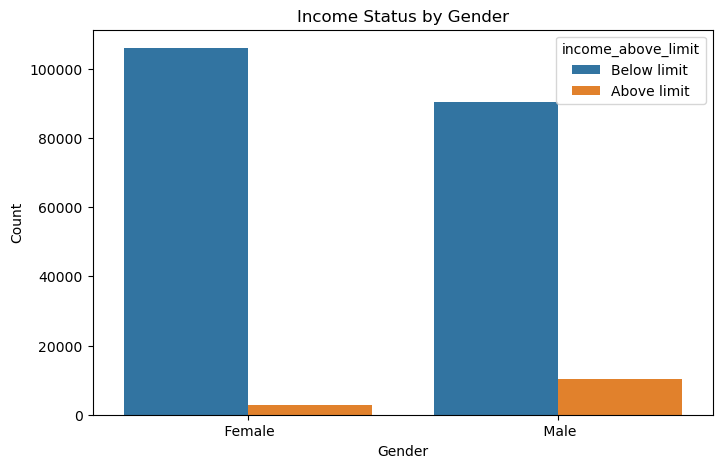

In [17]:

plt.figure(figsize=(8, 5))
sns.countplot(data=combined_data, x='gender', hue='income_above_limit')
plt.title('Income Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [18]:
# Check for missing values
missing_values = combined_data.isnull().sum()
print(missing_values)


ID                                    0
age                                   0
gender                                0
education                             0
class                                 0
education_institute                   0
marital_status                        0
race                                  0
is_hispanic                           0
employment_commitment                 0
unemployment_reason                   0
employment_stat                       0
wage_per_hour                         0
is_labor_union                        0
working_week_per_year                 0
industry_code                         0
industry_code_main                    0
occupation_code                       0
occupation_code_main                  0
total_employed                        0
household_stat                        0
household_summary                     0
under_18_family                       0
veterans_admin_questionnaire          0
vet_benefit                           0


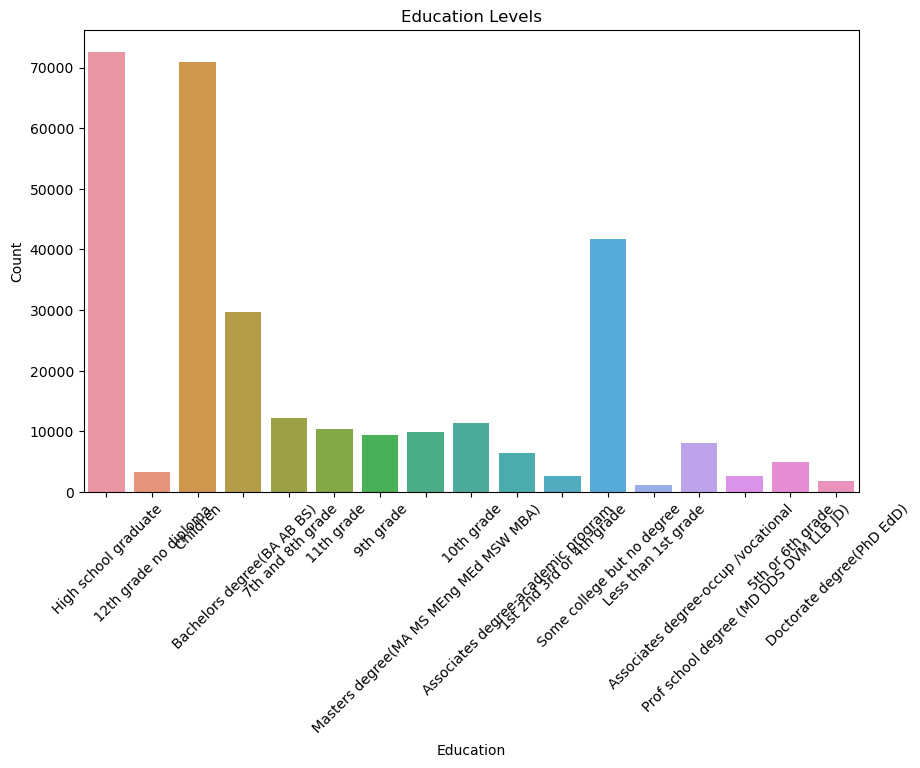

In [19]:
# Count plot for education levels
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='education')
plt.title('Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# - Handling missing data and outliers.

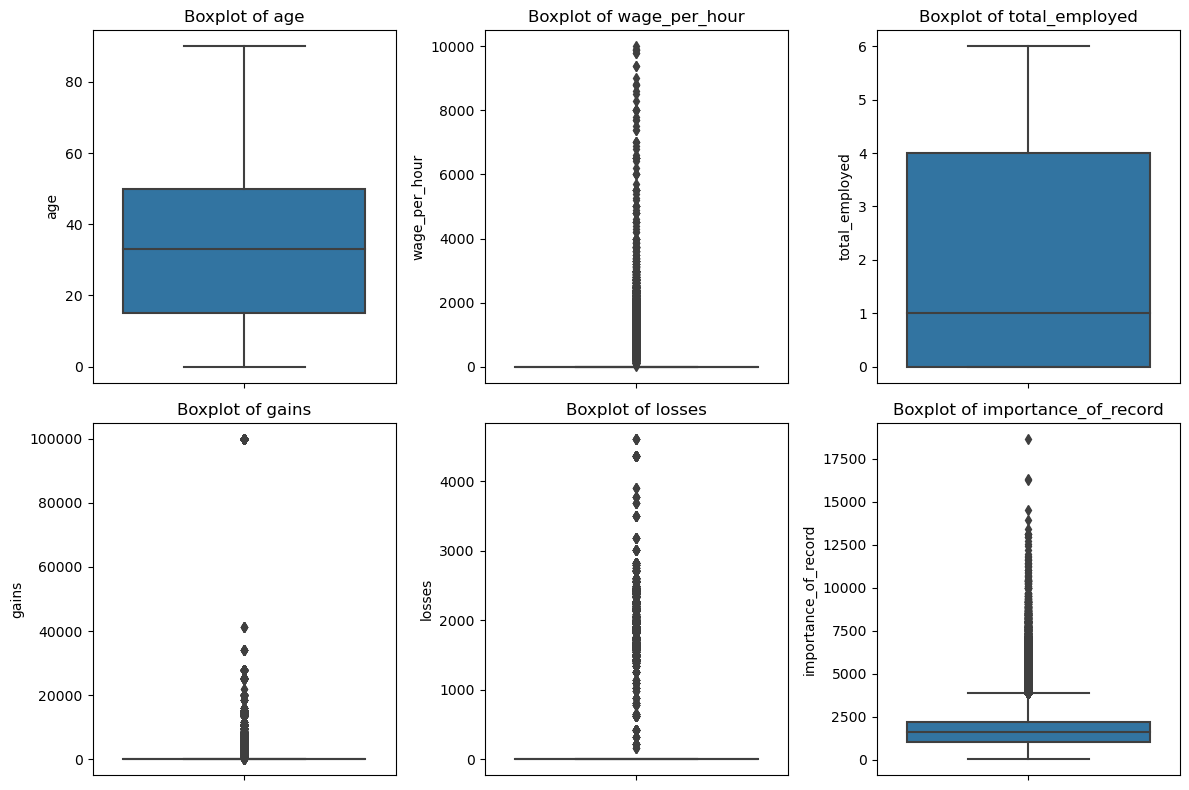

In [20]:
# Visualize boxplots for each numerical variable
numerical_variables = ['age', 'wage_per_hour', 'total_employed', 'gains', 'losses', 'importance_of_record']

plt.figure(figsize=(12, 8))
for i, variable in enumerate(numerical_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=combined_data, y=variable)
    plt.title(f'Boxplot of {variable}')
    plt.ylabel(variable)
plt.tight_layout()
plt.show()


In [21]:
from scipy.stats.mstats import winsorize

# Apply Winsorization to handle outliers
winsorized_variables = ['age', 'wage_per_hour', 'total_employed', 'gains', 'losses', 'importance_of_record']

for variable in winsorized_variables:
    combined_data[f'{variable}_winsorized'] = winsorize(combined_data[variable], limits=[0.05, 0.05])


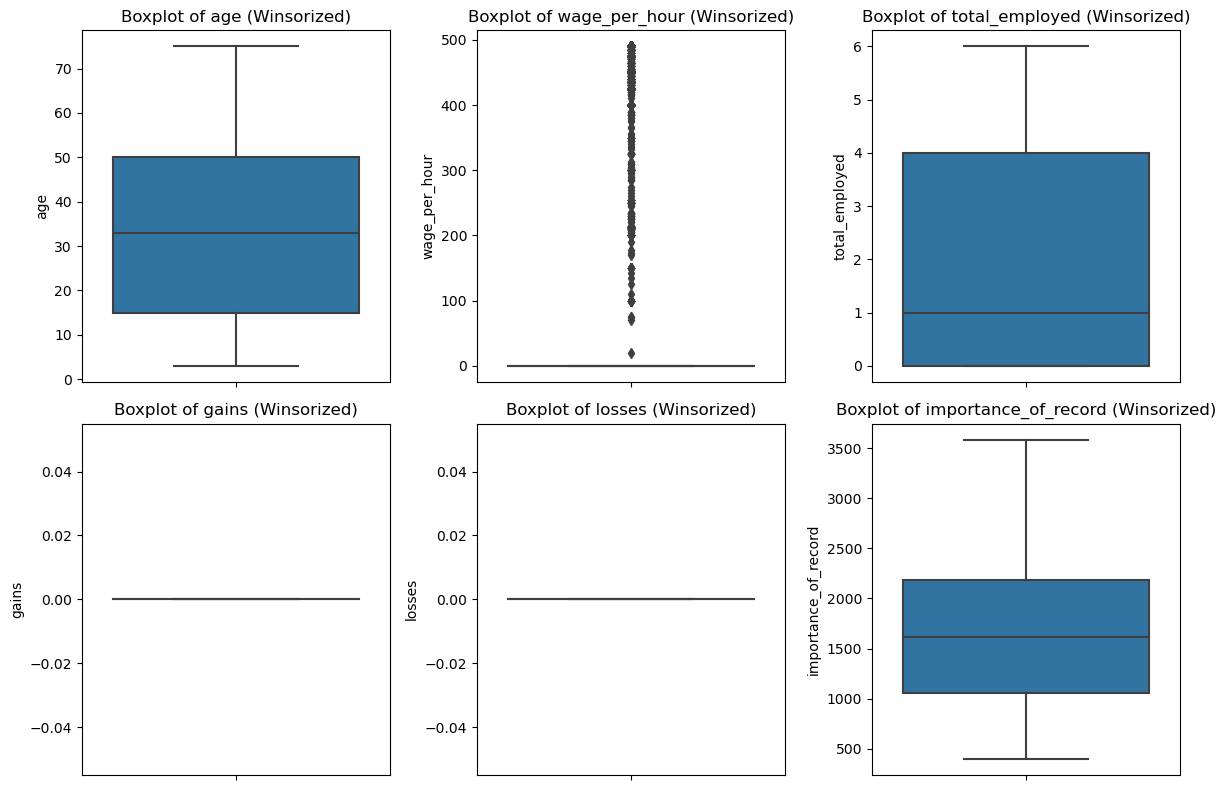

In [22]:
# Visualize boxplots for Winsorized variables
plt.figure(figsize=(12, 8))
for i, variable in enumerate(winsorized_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=combined_data, y=f'{variable}_winsorized')
    plt.title(f'Boxplot of {variable} (Winsorized)')
    plt.ylabel(variable)
plt.tight_layout()
plt.show()


# - Dealing with categorical variables and encoding them appropriately.

In [23]:
# Identify categorical variables
categorical_variables = ['gender', 'education', 'class', 'marital_status', 'race', 'is_hispanic', 'employment_commitment',
                         'unemployment_reason', 'is_labor_union', 'industry_code_main', 'occupation_code_main',
                         'household_stat', 'household_summary', 'under_18_family', 'veterans_admin_questionnaire',
                         'tax_status', 'citizenship', 'country_of_birth_own', 'country_of_birth_father',
                         'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_prev_sunbelt',
                         'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago',
                         'old_residence_reg', 'old_residence_state', 'income_above_limit']

# Apply one-hot encoding
data_encoded = pd.get_dummies(combined_data, columns=categorical_variables, drop_first=True)


In [24]:
print(data_encoded.columns)

Index(['ID', 'age', 'education_institute', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'occupation_code',
       'total_employed', 'vet_benefit',
       ...
       'old_residence_state_ South Dakota', 'old_residence_state_ Tennessee',
       'old_residence_state_ Texas', 'old_residence_state_ Utah',
       'old_residence_state_ Vermont', 'old_residence_state_ Virginia',
       'old_residence_state_ West Virginia', 'old_residence_state_ Wisconsin',
       'old_residence_state_ Wyoming', 'income_above_limit_Below limit'],
      dtype='object', length=375)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=['income_above_limit_Below limit'])
y = data_encoded['income_above_limit_Below limit']

# Ensure all categorical variables are encoded
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

In [26]:
non_numeric_data = data_encoded.select_dtypes(exclude=['number'])

In [27]:
non_numeric_data.columns

Index(['ID', 'education_institute', 'gender_ Male', 'education_ 11th grade',
       'education_ 12th grade no diploma',
       'education_ 1st 2nd 3rd or 4th grade', 'education_ 5th or 6th grade',
       'education_ 7th and 8th grade', 'education_ 9th grade',
       'education_ Associates degree-academic program',
       ...
       'old_residence_state_ South Dakota', 'old_residence_state_ Tennessee',
       'old_residence_state_ Texas', 'old_residence_state_ Utah',
       'old_residence_state_ Vermont', 'old_residence_state_ Virginia',
       'old_residence_state_ West Virginia', 'old_residence_state_ Wisconsin',
       'old_residence_state_ Wyoming', 'income_above_limit_Below limit'],
      dtype='object', length=356)

In [28]:
label_encoder = LabelEncoder()
data_encoded['ID'] = label_encoder.fit_transform(data_encoded['ID'])

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_encoded['education_institute'] = label_encoder.fit_transform(data_encoded['education_institute'])


# - Identifying relevant features that contribute to accurate income predictions.

In [30]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier to determine feature importances
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top N features
top_features = 10  # Specify the number of top features to display
print(f"Top {top_features} features contributing to income predictions:")
print(feature_importance_df.head(top_features))

Top 10 features contributing to income predictions:
                            Feature  Importance
0                                ID    0.570617
14             importance_of_record    0.042897
20  importance_of_record_winsorized    0.039517
1                               age    0.028444
15                   age_winsorized    0.026667
7                   occupation_code    0.015219
12                    stocks_status    0.013984
6                     industry_code    0.012808
5             working_week_per_year    0.010479
10                            gains    0.010202


# Balancing the Dataset

In [31]:
#conda install -c conda-forge imbalanced-learn

In [32]:
#import imblearn

In [33]:
from imblearn.under_sampling import RandomUnderSampler

In [34]:
# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check class distribution after resampling
print("Class distribution after random undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after random undersampling:
income_above_limit_Below limit
False    102784
True     102784
Name: count, dtype: int64


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [36]:
# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=['income_above_limit_Below limit'])
y = data_encoded['income_above_limit_Below limit']

In [37]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Initialize and train the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [40]:
# Calculate evaluation metrics
accuracy_encoded = accuracy_score(y_test, y_pred)
precision_encoded = precision_score(y_test, y_pred)
recall_encoded = recall_score(y_test, y_pred)
f1_encoded = f1_score(y_test, y_pred)

In [41]:
# Print evaluation metrics
print(f"Accuracy: {accuracy_encoded:.4f}")
print(f"Precision: {precision_encoded:.4f}")
print(f"Recall: {recall_encoded:.4f}")
print(f"F1 Score: {f1_encoded:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9367
Precision: 0.9632
Recall: 0.9395
F1 Score: 0.9512

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.93      0.91     20564
        True       0.96      0.94      0.95     39293

    accuracy                           0.94     59857
   macro avg       0.93      0.94      0.93     59857
weighted avg       0.94      0.94      0.94     59857



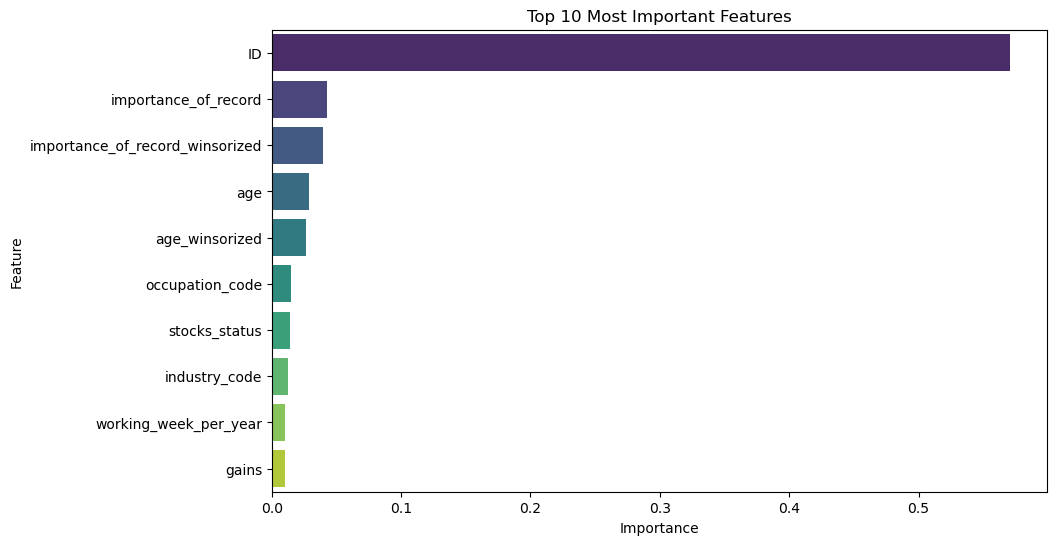

In [42]:
import seaborn as sns

# Number of top features to display
top_n = 10

# Get the top N most important features
top_features = feature_importance_df.head(top_n)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Most Important Features')
plt.show()


In [44]:
X_train_top_10 = X_train[top_features['Feature']]

In [45]:
X_train_top_10

,ID,importance_of_record,importance_of_record_winsorized,age,age_winsorized,occupation_code,stocks_status,industry_code,working_week_per_year,gains
33085,159269,2189.47,2189.47,12,12,0,0,0,0,0
176350,266136,1046.14,1046.14,44,44,35,0,19,52,0
5241,5241,1596.93,1596.93,5,5,0,0,0,0,0
110788,110788,2709.63,2709.63,9,9,0,0,0,0,0
83315,83315,1236.50,1236.50,66,66,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
119879,119879,742.86,742.86,30,30,29,0,33,8,0
49679,177688,1800.96,1800.96,42,42,32,12000,29,52,0
131932,217273,2637.26,2637.26,21,21,0,0,0,0,0
146867,236653,1563.54,1563.54,48,48,0,0,0,0,0


In [46]:
rf_classifier.fit(X_train_top_10, y_train)

RandomForestClassifier(random_state=42)

In [47]:
import joblib



# Save the trained model and top 10 features
joblib.dump((rf_classifier, top_features), 'income_prediction_model.pkl')

['income_prediction_model.pkl']

In [53]:
data_encoded

,ID,age,education_institute,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,...,old_residence_state_ South Dakota,old_residence_state_ Tennessee,old_residence_state_ Texas,old_residence_state_ Utah,old_residence_state_ Vermont,old_residence_state_ Virginia,old_residence_state_ West Virginia,old_residence_state_ Wisconsin,old_residence_state_ Wyoming,income_above_limit_Below limit
0,0,79,1,0,0,52,0,0,2,2,...,False,False,False,False,False,False,False,False,False,True
1,1,65,1,0,0,0,0,0,0,2,...,False,False,False,False,False,False,False,False,False,True
2,2,21,1,0,500,15,41,26,4,2,...,False,False,False,False,False,False,False,False,False,True
3,3,2,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,4,70,1,0,0,0,0,0,0,2,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89781,222202,5,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
89782,222203,81,1,0,0,0,0,0,0,2,...,False,False,False,False,False,False,False,False,False,False
89783,222204,65,1,0,0,52,46,31,6,2,...,False,False,False,False,False,False,False,False,False,False
89784,222205,38,1,2,0,43,33,19,3,2,...,False,False,False,False,False,False,False,False,False,False
